## 2절. 분포와 추론

### 2.1 표본과 실험

### 2.2 분포

In [1]:
# 이산형 확률분포
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

binomial = np.random.binomial(10, 0.5, 100)
np.histogram(binomial)

(array([ 1,  1,  6, 14,  0, 16, 25, 20, 12,  5], dtype=int64),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))

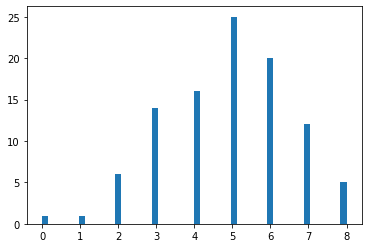

In [2]:
# 이항분포
plt.hist(binomial, bins=50)
plt.show()

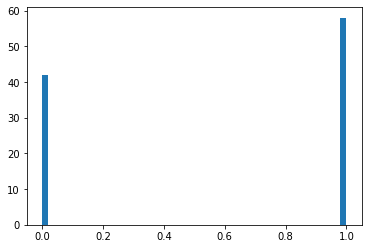

In [4]:
# 베르누이 분포
bernoulli = np.random.binomial(1, 0.5, 100)
plt.hist(bernoulli, bins=50)
plt.show()

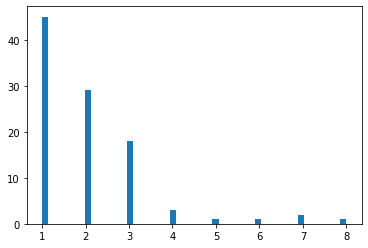

In [5]:
# 기하분포
geome = np.random.geometric(0.5, 100)
plt.hist(geome, bins=50)
plt.show()

In [15]:
# 다항 분포
multi = np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
multi

array([[6, 4, 4, 1, 1, 4]])

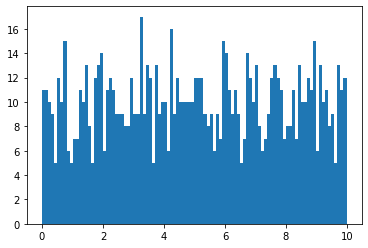

In [16]:
# 연속형 확률분포
# 균일분포
unif = np.random.uniform(0, 10, 1000)
plt.hist(unif, bins=100)
plt.show()

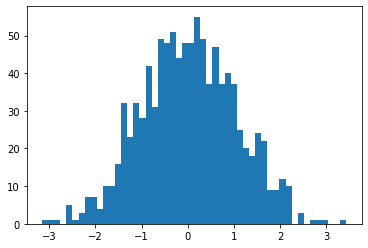

In [17]:
# 정규분포
norm = np.random.normal(0, 1, 1000)
plt.hist(norm, bins=50)
plt.show()

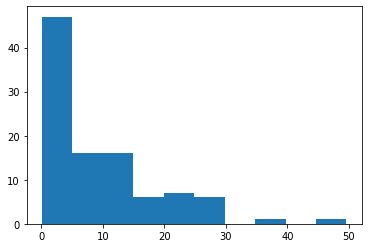

In [18]:
# 지수분포
expo = np.random.exponential(10, 100)
plt.hist(expo, bins=10)
plt.show()

### 2.3 추정과 가설검정

## 3절. 상관분석

### 3.1 피어슨 상관계수

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


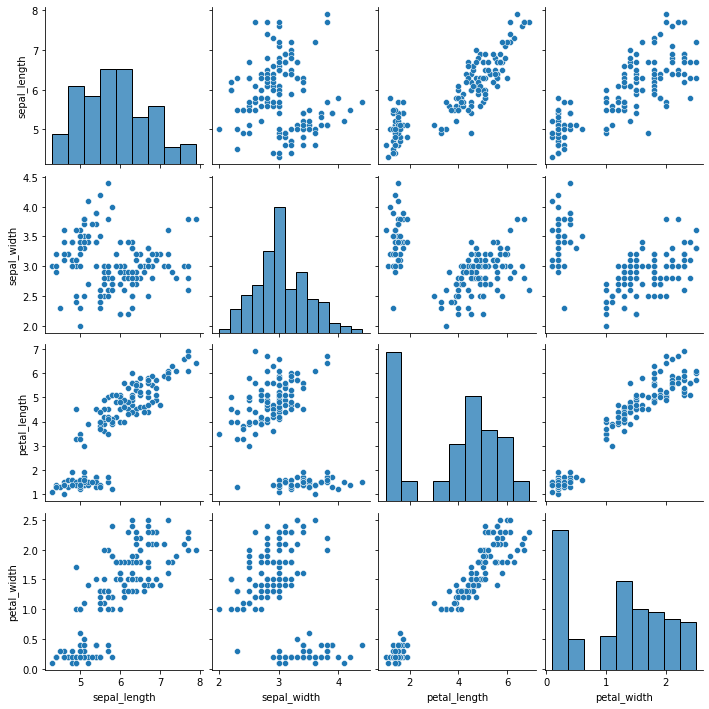

In [2]:
sns.pairplot(iris)

In [3]:
from scipy.stats import pearsonr

# return value: (피어슨 상관계수, p-value)
pearsonr(iris.petal_length, iris.petal_width)

'''
    유의확률 (p-value)이 0.05보다 작으므로 귀무가설 기각
    꽃잎 길이와 꽃잎 너비는 관계가 있다. 즉 상관관계가 있다.
'''

(0.9628654314027963, 4.6750039073255585e-86)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

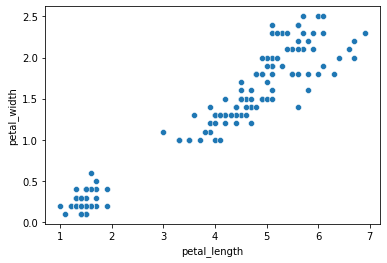

In [7]:
import warnings
warnings.filterwarnings('ignore')

sns.scatterplot(iris.petal_length, iris.petal_width)

### 3.2 스피어만 상관계수

In [8]:
iris = sns.load_dataset('iris')
iris.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [9]:
from scipy.stats.stats import spearmanr

spearmanr(iris.petal_length, iris.petal_width)

SpearmanrResult(correlation=0.9376668235763412, pvalue=8.156596854126675e-70)

### 3.3 상관계수 시각화

In [10]:
iris = sns.load_dataset('iris')

iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


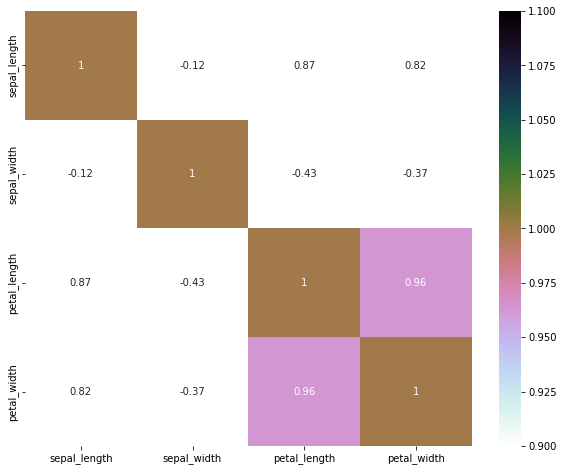

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(iris.corr(), vmin=1, vmax=1, annot=True, cmap='cubehelix_r')
plt.show()

## 4절. 단순 회귀분석

### 4.1 행렬을 이용한 회귀모형 구하기

In [18]:
x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [17, 24, 62, 49, 52, 105, 130, 125]

import numpy as np
a = np.c_[x, np.ones(8)]
b = np.array(y)

print(a)
print(b)

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [126.   1.]
 [144.   1.]
 [152.   1.]
 [158.   1.]]
[ 17  24  62  49  52 105 130 125]


In [22]:
# 행렬 내적, 곱
model = np.linalg.inv(a.T @ a) @ a.T @ b
model

# y=ax+b에서 a(weight) = 0.87962664, b(bias) = -27.35846347

array([  0.87962664, -27.35846347])

### 4.2 회귀모형과 예측

In [23]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r_value: {r_value}")
print(f"p_value: {p_value}")
print(f"std_err: {std_err}")

'''
    - 구해진 회귀식: y = 0.8796*x - 27.3585
    - p-value(유의확률)가 0.05보다 작으므로 유의수준 5%하에서 회귀식이 유의함
    - r-value(결정계수)는 회귀식이 데이터를 약 89% 설명함.
'''

slope: 0.8796266379465087
intercept: -27.3584634715491
r_value: 0.89008928103186
p_value: 0.003051790677096642
std_err: 0.18388671751663876


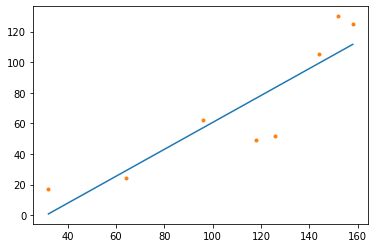

In [29]:
%matplotlib inline
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.plot(X, Y, '.')
plt.show()

In [31]:
# 최소제곱 다항 회귀식 계산
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

# 1차 회귀식
fit = np.polyfit(X, Y, 1)
print(fit)

# 다항식 함수 생성
fit_fn = np.poly1d(fit)
print(fit_fn)

[  0.87962664 -27.35846347]
 
0.8796 x - 27.36


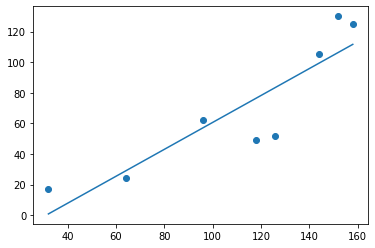

In [32]:
plt.scatter(X, Y)
plt.plot(X, fit_fn(X))
plt.show()

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]
            6             5             4           3         2
-6.183e-09 x + 3.467e-06 x - 0.0007702 x + 0.08624 x - 5.098 x + 150.4 x - 1704


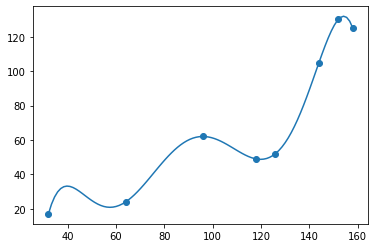

In [44]:
# 2차 방정식으로 표현
# fit = np.polyfit(X, Y, 2)
# fit_fn = np.poly1d(fit)
# sample_X = np.linspace(30, 160, 100)

# plt.scatter(X, Y)
# plt.plot(sample_X, fit_fn(sample_X))
# plt.show()

# 차수 유동화 반영 회귀 그래프 함수
def draw_polyfit(X, Y, deg=1):
    fit = np.polyfit(X, Y, deg)
    print(fit)
    fit_fn = np.poly1d(fit)
    print(fit_fn)
    
    sample_X = np.linspace(min(X), max(X), 100)
    
    plt.scatter(X, Y)
    plt.plot(sample_X, fit_fn(sample_X))
    plt.show()

draw_polyfit(X, Y, 6)

## 5절. 포뮬러를 이용한 회귀식

In [45]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[X, Y], columns=['x', 'y'])
df

,x,y
0,32,17
1,64,24
2,96,62
3,118,49
4,126,52
5,144,105
6,152,130
7,158,125


In [53]:
# 포뮬러를 이용한 선형회귀식 구현
# 1차방정식
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [54]:
import statsmodels.api as sm

model = sm.OLS.from_formula('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [57]:
# 상수항을 포함하지 않는 3차방정식
# I() 함수는 포뮬러가 수식을 포함할 경우 사용
model2 = ols('y ~ x + I(x**2) + I(x**3) - 1', data=df)
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

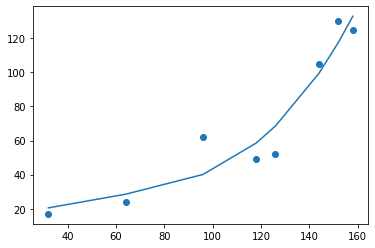

In [59]:
# 회귀모형으로 예측한 값
y_ = result2.predict(df.x)

import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, y_)
plt.show()

## 6절. 정규화 선형회귀

### 6.1 정규화 선형회귀모형

### 6.2 statsmodels의 정규화 회귀모형

### 6.3 Scikit-Learn의 정규화 회귀모형

### 6.4 Ridge 모형과 Lasso 모형의 차이

## 7절. 다중회귀분석

### 7.1 다중 회귀의 변수 추정

### 7.2 다중회귀분석 예

### 7.3 다중회귀식의 추정방법

### 7.4 상관계수와 결정계수

### 7.5 회귀분석의 검증 요소들

### 7.6 이상치 탐색

### 7.7 다중공선성

## 8절. 회귀모형 성능평가

### 8.1 사이킷런의 모형 평가 방법

### 8.2 회귀모형 평가를 위한 scoring 속성

### 8.3 k-폴드 교차 검증

### 8.4 회귀모형 평가 함수